# **Report on Analysis of Heart Data** 💓

In [ ]:
import numpy as np
import pandas as pd

✅ Loading data from file previewing it.

In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


✅ Loading information about dataset.

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


✅ Let's check how much target generated from each sex here 1 denotes male while 0 denotes female

93
72


<Axes: title={'center': 'Gender Vs Number of Heart Attacks'}, xlabel='Gender', ylabel='Number of Patients'>

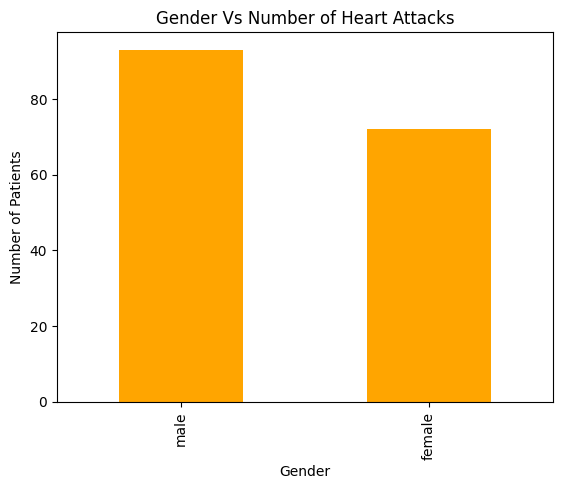

In [ ]:
male_targets = heart[heart['sex']==1]['target'].sum()
print(male_targets)
female_targets = heart[heart['sex']==0]['target'].sum()
print(female_targets)

gender = pd.Series({'male':male_targets, 'female':female_targets})
gender.plot(kind='bar', title='Gender Vs Number of Heart Attacks', ylabel='Number of Patients', xlabel='Gender', color='orange')

❓ from above we can see that number of male higher than that of females
but does it really shows that male are at higher risk, does data properly distributed

In [ ]:
heart['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

💡 From above we can see that dataset is biased and count of male and female is not nearly same
so lets calculate the ratio of each sex for now

Male rate of getting attack : 44.93
Female rate of getting attack : 75.00 


<Axes: title={'center': 'Percentage of Heart Attack Per Gender'}, xlabel='Gender', ylabel='Risk in Percent(%)'>

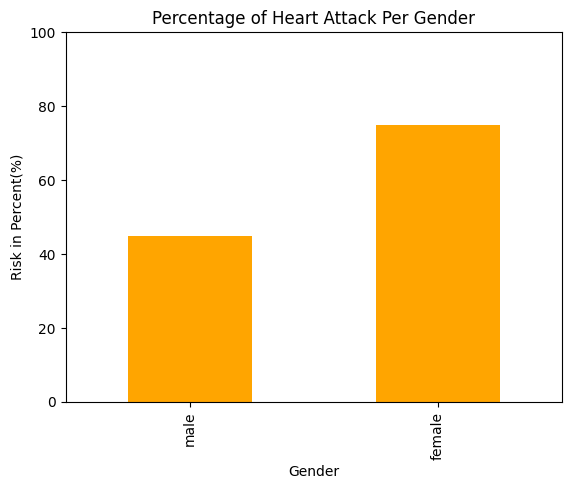

In [ ]:
male_percent = male_targets/207 * 100
female_percent = female_targets/96 * 100
print(f"Male rate of getting attack : %.2f" %male_percent)
print(f"Female rate of getting attack : %.2f " %female_percent)

percent = pd.Series({'male':male_percent, 'female':female_percent})
percent.plot(kind='bar', ylim=(0, 100), title="Percentage of Heart Attack Per Gender", ylabel='Risk in Percent(%)', xlabel='Gender', color='orange')

✅ From above we can see that "***females are at high risk than male***" because their percentage is higher than male

✅ Now lets check the mean cholestrol level of target heart attack true

In [ ]:
heart[heart['target'] == 1]['chol'].mode()

0    197
1    204
2    211
3    226
4    234
5    240
Name: chol, dtype: int64

✅ Here 197 is frequent minimum cholestrol level for who aquired heart attack

✅ Lets also find for which kind of chest pain (cp) is symptom of heart attack
plotting the cptype vs number of targets

<Axes: title={'center': 'Number of Chest Pain per Type'}, xlabel='Chest Pain Type', ylabel='Number of Patients'>

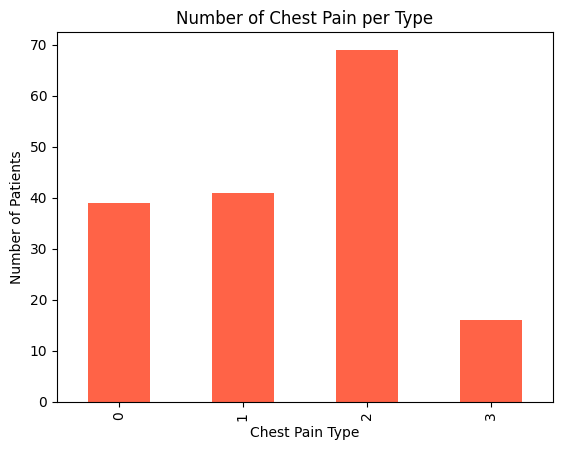

In [ ]:
heart.groupby('cp')['target'].sum().plot(kind='bar', title='Number of Chest Pain per Type', xlabel='Chest Pain Type', ylabel='Number of Patients', color='tomato')

✅ we can see from above type 2 chest pain is main symptom of heart attack followed by type 1, 0 and 3

 ✅ Now lets find which age group would likely fall for heart attack
 first divide the age into intervals of 10 years each

In [ ]:
bin_size = 10  # Specify the size of each interval
min_age = heart['age'].min()  # Minimum age in the dataset
max_age = heart['age'].max()  # Maximum age in the dataset
bins = list(range(min_age, max_age + bin_size, bin_size))
labels = [f"{i}-{i+bin_size-1}" for i in range(min_age, max_age, bin_size)]
heart['age_group'] = pd.cut(heart['age'], bins=bins, labels=labels, include_lowest=True)

#printing min_age and max_age
print('Age is defined from')
print(min_age, ' to ', max_age)

Age is defined from
29  to  77


<Axes: title={'center': 'Age Group Vs Number of Patients'}, xlabel='age_group', ylabel='Number of Patients'>

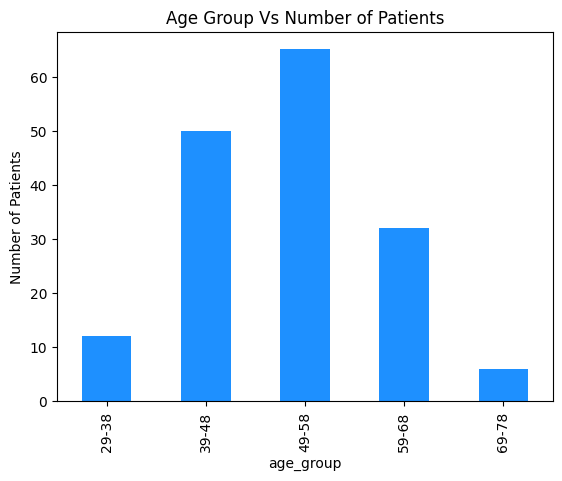

In [ ]:
heart.groupby('age_group', observed=False)['target'].sum().plot(kind='bar',title='Age Group Vs Number of Patients', ylabel='Number of Patients', color='dodgerblue')

✅ Here we can see that from age 49-58 has highest chance of getting attack followed by


*   39-48
*   59-68
*   29-38
*   69-78









❓ But does this age group is evenly spread

<Axes: ylabel='Age Groups'>

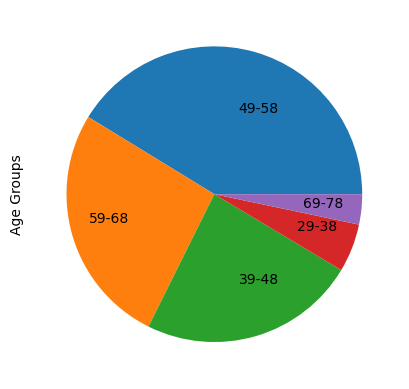

In [ ]:
heart['age_group'].value_counts().plot(kind='pie', ylabel='Age Groups' ,labeldistance=0.6)

💡 As we can see this data is not evenly distributed and has more records of age_group 49-58, slightly followed by 59-68 and then 39-48. Other age group has less records. Let's find percentage of risk per group instead

<Axes: title={'center': 'Age Groups Vs Percentage of Patients'}, xlabel='age_group', ylabel='Patients in Percent(%)'>

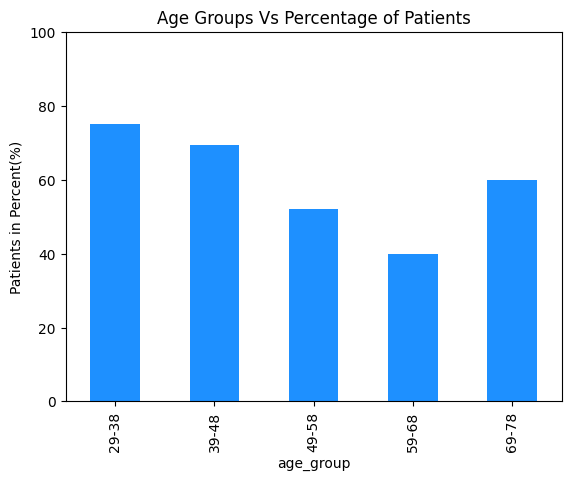

In [ ]:
age_per = heart.groupby('age_group', observed=False)['target'].mean()
age_per = age_per * 100
age_per.plot(kind='bar', ylim=(0, 100), title='Age Groups Vs Percentage of Patients', ylabel='Patients in Percent(%)', color='dodgerblue')

Now this gives us more accurate discreption about which age group has high rate of getting heart attacks which is from age 29-38 followed by
*   39-48
*   69-78
*   49-58
*   59-68




# Conclusion

We have found out that females have high risk of getting heart attacks. Then we found out a symptom which indicate that above 197 cholestrol level person is prone to heart attack and lastly found out age-wise risk of getting heart attack.